In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout import *

In [3]:
ncf = NCFile('/artemis/readout/2016-04-11_000046_lo_1110.0.nc',cache_s21_raw=True)

In [7]:
swas = [ncf.read(name) for name in ncf.measurement_names()]

In [8]:
swa = swas[0]

In [100]:
swa.state

{u'hittite_power_dBm': False, u'mmw_atten_turns': [7, 7]}

In [87]:
meas = swas[250]

In [101]:
meas.state

{u'hittite_power_dBm': False,
 u'lockin_voltage': 0.00278379,
 u'mmw_atten_turns': [7, 7]}

In [9]:
len(swa.stream_arrays)

98

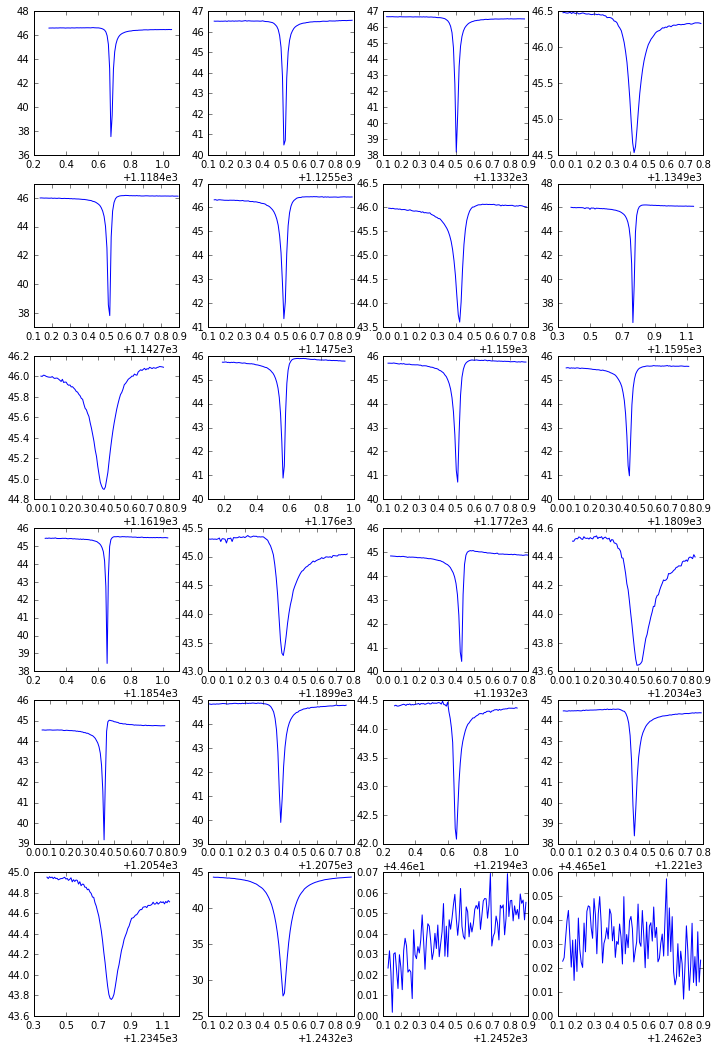

In [102]:
fig,axs = subplots(6,4,figsize=(12,18))
for k in range(24):
    ax = axs.flatten()[k]
    swp = swa.sweep(k)
    ax.plot(swp.frequency_MHz_stack,20*np.log10(np.abs(swp.s21_points)))
    s21 = swp.s21_points
    #plot_ri(s21,ax=ax)
    #plot_ri(meas.stream(k).s21_raw,',',ax=ax)

In [38]:
from kid_readout.measurement import basic
reload(basic)

<module 'kid_readout.measurement.basic' from '/home/gjones/kid_readout/kid_readout/measurement/basic.py'>

In [97]:
sss = basic.SingleSweepStream(basic.SingleResonatorSweep(swa.sweep(17).streams),meas.stream(17),state=meas.state)

In [40]:
sss.x.shape

(65536,)

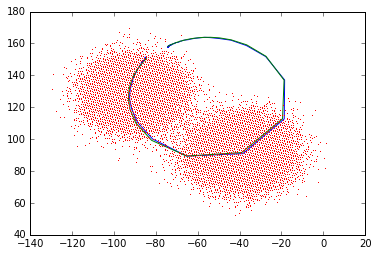

In [98]:
s21 = sss.sweep.resonator.s21_data
plot_ri(s21)
s21m = sss.sweep.resonator.model(x=sss.sweep.resonator.freq_data)
plot_ri(s21m)
plot_ri(sss.stream.s21_raw,',')

In [78]:
sss.stream.frequency_MHz

1148.0234375

In [79]:
sss.sweep.resonator.f_0-sss.stream.frequency

-2935.193274974823

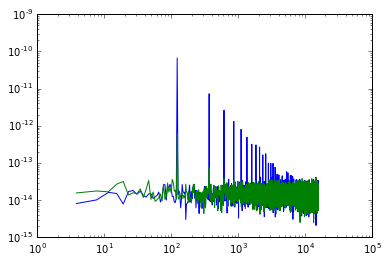

In [99]:
loglog(sss.S_frequency,sss.S_xx)
loglog(sss.S_frequency,sss.S_yy)

In [13]:
meas = swas[250]

In [16]:
meas.s21_raw_variable.shape

(32, 65536)

In [18]:
fold = meas.s21_raw.reshape((32,-1,256)).mean(1)

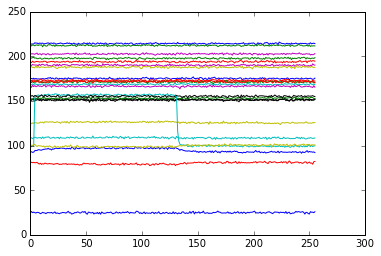

In [19]:
plot(np.abs(fold[:24,:]).T)